In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
train_dir = '/content/drive/MyDrive/Dataset'
test_dir = '/content/drive/MyDrive/test'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator # divides data into batches

train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224,224),batch_size=7,class_mode='binary')
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(224,224),batch_size=7,class_mode='binary')

Found 259 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'BLU': 0, 'CLN': 1}

In [ ]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
test_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))# convolutional layer
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())# convert multidimentional into 1D array
model.add(Dense(512,activation='relu')) # fully connected neural net layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 26, 26, 128)      

In [ ]:
# training the model
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,steps_per_epoch=10,epochs=100,validation_data=test_generator)

Epoch 1/100
10/10 [==============================] - 5s 148ms/step - loss: 0.9479 - accuracy: 0.5571 - val_loss: 0.7040 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 1s 88ms/step - loss: 0.7136 - accuracy: 0.5286 - val_loss: 0.6970 - val_accuracy: 0.5000
Epoch 3/100
10/10 [==============================] - 1s 95ms/step - loss: 0.7309 - accuracy: 0.6571 - val_loss: 0.7107 - val_accuracy: 0.4833
Epoch 4/100
10/10 [==============================] - 1s 89ms/step - loss: 0.7834 - accuracy: 0.6714 - val_loss: 0.7318 - val_accuracy: 0.8167
Epoch 5/100
10/10 [==============================] - 1s 85ms/step - loss: 0.9336 - accuracy: 0.7286 - val_loss: 0.7527 - val_accuracy: 0.5000
Epoch 6/100
10/10 [==============================] - 1s 87ms/step - loss: 0.5744 - accuracy: 0.7429 - val_loss: 0.8554 - val_accuracy: 0.8167
Epoch 7/100
10/10 [==============================] - 1s 113ms/step - loss: 0.5826 - accuracy: 0.8429 - val_loss: 0.8525 - val_accuracy: 0.4833
Epoc

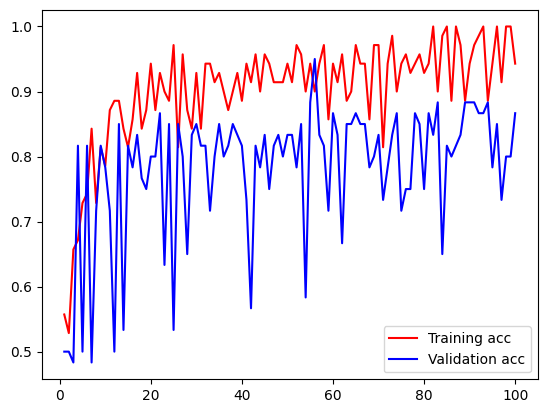

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']



epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'r', label='Training acc')
plt.plot(epochs,val_acc,'b', label='Validation acc')
plt.legend()


plt.show()

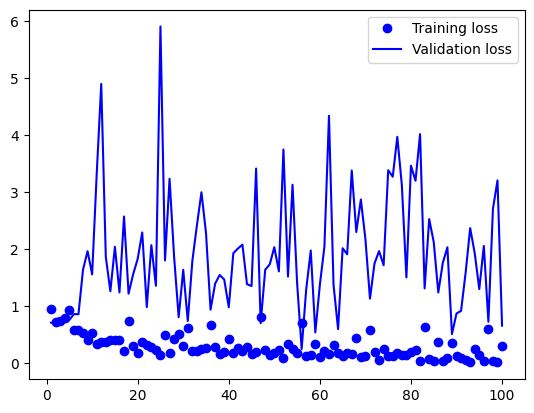

In [ ]:
loss = history.history['loss']
loss_val = history.history['val_loss']

plt.plot(epochs,loss,'bo', label='Training loss')
plt.plot(epochs,loss_val,'b', label='Validation loss')
plt.legend()

plt.show()

In [ ]:
#model.save('blu_vs_cln.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
path = '/content/drive/MyDrive/test/CLN/Cln_0 (11).jpg'
img = image.load_img(path, target_size=(224,224))
plt.imshow(img,interpolation ='nearest')

plt.show()

In [ ]:
import numpy as np

img_array = np.array(img)
img_array.shape


In [ ]:
img_array = img_array.reshape(1,224,224,3)

In [ ]:
a = model.predict(img_array)
print(a)